# Estimate Sobol’ indices for the Ishigami function by a sampling method: a quick start guide to sensitivity analysis

### Analyse de la fonction Ishigami avec l'ensemble de codes dévelopés pour l'analyse de sensibilité sur les cahmps stochastiques.

#### Comparaison et corréctions

La même logique d'écriture de codes est utilisée que dans le script 'Demo Analyse de sensibilité poutre' : https://openturns.github.io/openturns/master/examples/reliability_sensitivity/sensitivity_sobol.html

In [36]:
# Voici les deux scripts destinés à gérer l'analyse de sensibilité sur les champs stochastiques
import NdGaussianProcessSensitivity as ngps
import NdGaussianProcessConstructor as ngpc
import NdGaussianProcessSensitivityIndices as ngpsi
# Classes utilitaires
import numpy                        as np
import openturns                    as ot
from   importlib                import reload 

In [37]:
# This is the formula used in the openTURNS example. 
formula = ['sin(X1) + 7. * sin(X2)^2 + 0.1 * X3^4 * sin(X1)']
input_names = ['X1', 'X2', 'X3']
g = ot.SymbolicFunction(input_names, formula)

# we have to modifiy the function, be cause it takes as an input a random vector, un-correlated
# in the case of our method, un-correlated inputs are clearly distinct. 
def gMod(X1,X2,X3):
    X = np.stack([X1,X2,X3]).T
    return g(X)

In [38]:
X = np.random.uniform(-np.pi,np.pi,[10,3])
assert gMod(X[...,0], X[...,1], X[...,2]) == g(X) ,""

Maintenant nous définissons nos variables d'entrée, avec les fonctions contenues dans notre méthode 

In [39]:
reload(ngpc)
reload(ngps)
lower  = -np.pi
upper  = np.pi
nameX1, nameX2, nameX3 = 'X1', 'X2', 'X3'
RV_X1 = ot.Arcsine(lower,upper)
RV_X1.setName(nameX1)
RV_X2 = ot.Arcsine(lower,upper)
RV_X2.setName(nameX2)
RV_X3 = ot.Arcsine(lower,upper)
RV_X3.setName(nameX3)

In [40]:
# here we have to explicitely define our outputs
outputVariables = {'out1_name' :  #any name here is fine
                   {
                         'name'     : 'Y',
                         'position' : 0,   #Position in the ouput, if the output were a list
                         'shape'    : (1,)  
                    },
                  }

In [41]:
inputList    = [RV_X1, RV_X2, RV_X3]
soloFunction = sampleFunction = gMod #Easy in this case
size         = 100000

In [42]:
processSensitivityAnalysis = ngps.NdGaussianProcessSensitivityAnalysis(inputList, 
                                                                       outputVariables,
                                                                       sampleFunction,
                                                                       soloFunction,
                                                                       size)

Input Variables are (without Karhunen Loeve Decomposition) :
 X1 X2 X3 

Output Variables are :
 ['Y'] 

Composed distribution built with processes and distributions: X1 X2 X3


In [43]:
processSensitivityAnalysis.prepareSobolIndicesExperiment()

Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)
number of samples for sobol experiment =  500000 

input design is:  [[-2.81900145  3.13298691  0.18043042]
 [-1.94367471  2.09491657 -3.03608608]
 [ 1.00972264 -3.03153983  2.05764705]
 ...
 [ 3.11392334  3.12787009 -0.96962707]
 [-3.02749553 -2.57984192  1.07141721]
 [-0.80595488 -2.25338901 -2.01791039]]


In [44]:
processSensitivityAnalysis.getOutputDesignAndPostprocess()

Converting list of outputs into matrix: 
Element  1  has shape  (500000, 1)
Final shape matrix:  (500000, 1)
Columns where nan :  [] 


No errors while processing, the function has returned no np.nan.



In [45]:
output = processSensitivityAnalysis.outputDesignList
output1 = output[0]

In [46]:
%pylab inline
pylab.rcParams['figure.figsize'] = (13, 5)
import NdGaussianProcessSensitivityIndices as ngpsi
_=reload(ngpsi)

Populating the interactive namespace from numpy and matplotlib


/home/simady/anaconda/envs/stochastic_field_env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [47]:
S, Stot, varS, varStot = ngpsi.NdGaussianProcessSensitivityIndicesBase.getSobolIndices(output1, 100000)

There are 3 indices to get in (1,) dimensions with 1 elements
After centering, mean= [2.17631706] 
std=  [4.59371245]
After centering, mean= [1.63175067] 
std=  [4.65759347]
After centering, mean= [1.08903078] 
std=  [4.65801189]
After centering, mean= [0.54280835] 
std=  [4.59310649]
After centering, mean= [3.86535248e-18] 
std=  [4.46296578]
basic output shape is: (100000, 1)
output reshaped into matrix of shape (dim<=2)  [100000, 1]
data for variance calculus prepared 
 X_fo shape is (100000,) Y_fo shape is (100000,) 

Covariance is: [[481.46760235  97.3829069 ]
 [ 97.3829069  980.48221022]]
Sample mean is: [8.452611220038309, 19.94771187293183]
Psi mean is: [ 0.05013106 -0.02124246]
variance is: 1.4450147561241352e-05 

Covariance is: [[617.4474062  191.22848226]
 [191.22848226 980.48221022]]
Sample mean is: [6.4465800988779005, 19.94771187293183]
Psi mean is: [-0.05013106  0.01620105]
variance is: 1.4984503882634377e-05 

basic output shape is: (100000, 1)
output reshaped into mat

The output is scalar
The sensitivity is measured accordingly to the 3 input variables, namely:
 X1 and X2 and X3


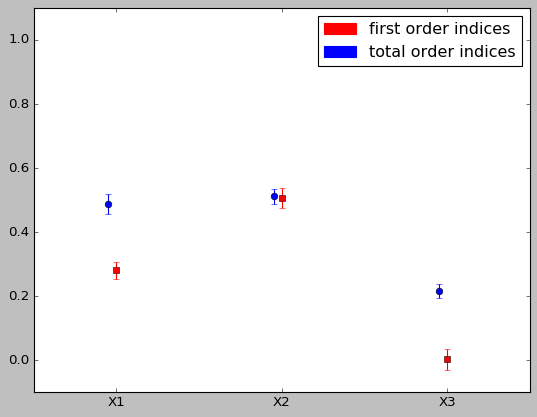

In [35]:
varNames = ['X1', 'X2', 'X3']
ngpsi.plotSobolIndicesWithErr(S, varS, varNames, 3, Stot, varStot)